In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from utils import imread
from utils import normxcorr2
from automatic_rectification import AutoRect

In [2]:
img_bg = imread(Path(os.getcwd(), 'data/img_bg.tif'))
img_beads = imread(Path(os.getcwd(), 'data/img_beads.tif'))

Text(0.5, 1.0, 'bead img')

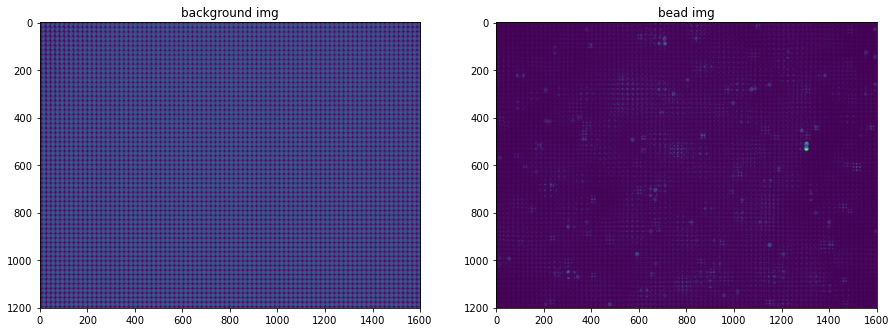

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,40))
ax1.imshow(img_bg)
ax1.set_title('background img')
ax2.imshow(img_beads)
ax2.set_title('bead img')

# Either use rect params of img_bg from before

In [4]:
auto_rect1 = AutoRect(img_bg, img=img_beads, nnum=19, pitch=19.22, center_x_rect_bg=803.83, center_y_rect_bg=608.60)

In [5]:
# rectification parameters will be set, and no background rectification will be done 
# (background rectification takes some time)
auto_rect1.center_x_rect_bg, auto_rect1.center_y_rect_bg, auto_rect1.pitch

(803.83, 608.6, 19.22)

In [6]:
img_bg_rectified_1 = auto_rect1.rectify_img_bg()
img_beads_rectified_1 = auto_rect1.rectify_img()

# Or rectify img_bg first, then use the fitted parameters to rectify img_beads
## (if available use precomputed params, finding params takes some time)

In [7]:
auto_rect2 = AutoRect(img_bg, img=img_beads, nnum=19)

In [8]:
img_bg_rectified_2 = auto_rect2.rectify_img_bg()
img_beads_rectified_2 = auto_rect2.rectify_img()

In [6]:
auto_rect2.center_x_rect_bg, auto_rect2.center_y_rect_bg, auto_rect2.pitch

(803.8354616765337, 608.6040715271199, 19.222332861429884)

# Visually check quality of rectification

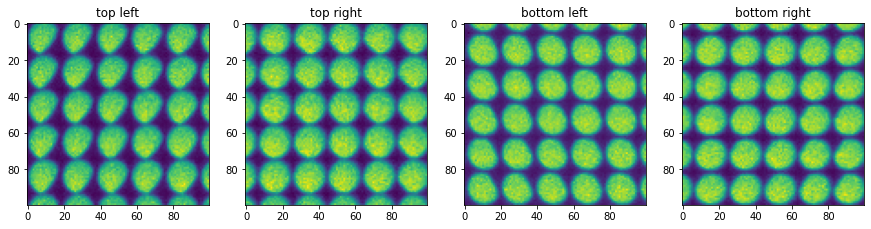

In [10]:
auto_rect2.plot_rect_quality_check()
# Default argument of this function is the rectified background image
# The rectified background image (img_bg) can be accessed with auto_rect.img_rect_bg
# auto_rect.plot_rect_quality_check(img=auto_rect.img_rect_bg)

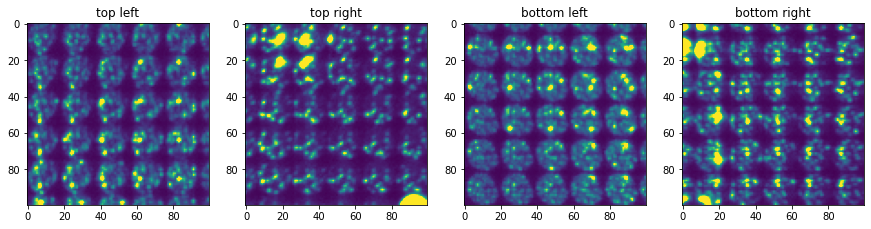

In [11]:
# The rectified img (in this case rectified img_beads) can be accessed with auto_rect.img_rect
auto_rect2.plot_rect_quality_check(img=auto_rect2.img_rect, vmin=auto_rect2.img_rect.min(), vmax=auto_rect2.img_rect.max()*0.05)